In [25]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [27]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, classification_report,  roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:

import numpy as np 
import pandas as pd 

In [29]:
df = pd.read_csv("/content/data.csv")
df.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


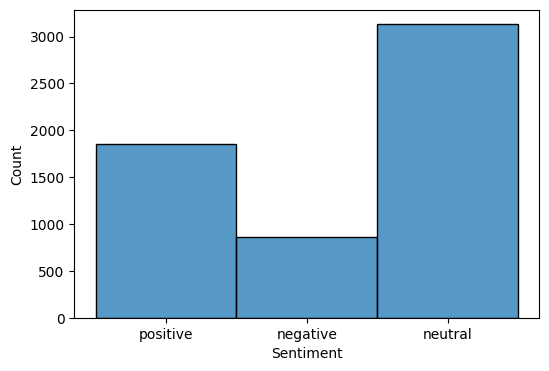

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
sns.histplot(x = "Sentiment",data = df)
plt.show()

In [31]:
print(df.isnull().sum())
print(len(df))

Sentence     0
Sentiment    0
dtype: int64
5842


In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded_y = encoder.fit_transform(df["Sentiment"])
dummy_y = tf.keras.utils.to_categorical(encoded_y)

In [34]:
df_sentiment = pd.DataFrame(dummy_y,columns = encoder.classes_,index = df["Sentence"].index)

In [35]:
df.drop(columns = ["Sentiment"],inplace = True)

In [36]:
df = pd.concat([df,df_sentiment],axis = 1)
df.head(5)

,Sentence,negative,neutral,positive
0,The GeoSolutions technology will leverage Bene...,0.0,0.0,1.0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1.0,0.0,0.0
2,"For the last quarter of 2010 , Componenta 's n...",0.0,0.0,1.0
3,According to the Finnish-Russian Chamber of Co...,0.0,1.0,0.0
4,The Swedish buyout firm has sold its remaining...,0.0,1.0,0.0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df["Sentence"],df.iloc[:,1:],test_size = 0.4,
                                                 random_state = 42,shuffle = False)

In [38]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size = 0.5,random_state = 42,shuffle = False)

In [40]:
df = pd.concat([df,df_sentiment],axis = 1)
df.head(5)

,Sentence,negative,neutral,positive,negative,neutral,positive
0,The GeoSolutions technology will leverage Bene...,0.0,0.0,1.0,0.0,0.0,1.0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1.0,0.0,0.0,1.0,0.0,0.0
2,"For the last quarter of 2010 , Componenta 's n...",0.0,0.0,1.0,0.0,0.0,1.0
3,According to the Finnish-Russian Chamber of Co...,0.0,1.0,0.0,0.0,1.0,0.0
4,The Swedish buyout firm has sold its remaining...,0.0,1.0,0.0,0.0,1.0,0.0
